<a href="https://colab.research.google.com/github/shauryapanhale/skill2/blob/main/SKILL_LCA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have used Iot-Bot dataset, and i have used the third file of this dataset to perform my experiments


EXPERIMENT 1: Loading and merging dataset

step 1: importing libraries

In [4]:
import pandas as pd
import os

step 2: load all the csv file

In [6]:
# Load the CSV file
df = pd.read_csv('/content/final_data.csv')
# Preview the data
print("Shape:", df.shape)
df.head()

Shape: (9716, 35)


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,500,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,5811.0,2,120,...,1,1,60,60,21276.59570,0.0,0.0,1,Reconnaissance,Service_Scan
1,501,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,843.0,2,120,...,1,1,60,60,19607.84375,0.0,0.0,1,Reconnaissance,Service_Scan
2,502,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,45100.0,2,120,...,1,1,60,60,20000.00000,0.0,0.0,1,Reconnaissance,Service_Scan
3,503,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,5510.0,2,120,...,1,1,60,60,22727.27344,0.0,0.0,1,Reconnaissance,Service_Scan
4,504,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,61900.0,2,120,...,1,1,60,60,22727.27344,0.0,0.0,1,Reconnaissance,Service_Scan


Experimen 2: data cleaning

step 1: check basic info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9716 entries, 0 to 9715
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pkSeqID       9716 non-null   int64  
 1   stime         9716 non-null   int64  
 2   flgs          9716 non-null   object 
 3   proto         9716 non-null   object 
 4   saddr         9716 non-null   object 
 5   sport         9710 non-null   float64
 6   daddr         9716 non-null   object 
 7   dport         9710 non-null   float64
 8   pkts          9716 non-null   int64  
 9   bytes         9716 non-null   int64  
 10  state         9716 non-null   object 
 11  ltime         9716 non-null   int64  
 12  seq           9716 non-null   int64  
 13  dur           9716 non-null   float64
 14  mean          9716 non-null   float64
 15  stddev        9716 non-null   float64
 16  smac          0 non-null      float64
 17  dmac          0 non-null      float64
 18  sum           9716 non-null 

step 2: strip extra spaces

In [8]:
df.columns = df.columns.str.strip()

step 3: drop rows with too many missing values

In [9]:
df.dropna(thresh=df.shape[1]*0.8, inplace=True)

step 4: fill remaining missing values with 0

In [10]:
df.fillna(0, inplace=True)

step 4: drop columns which are not useful like ip addresses

In [11]:
df.drop(columns=['saddr', 'daddr'], inplace=True, errors='ignore')

step 5: now there shud be no null values

In [12]:
print("After cleaning, shape:", df.shape)
df.isnull().sum()

After cleaning, shape: (9710, 33)


,0
pkSeqID,0
stime,0
flgs,0
proto,0
sport,0
dport,0
pkts,0
bytes,0
state,0
ltime,0


Experiment 3: Implement encoding techniques

step 1: label encoding

label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

# Define which columns are categorical
categorical_cols = ['proto', 'state', 'flgs', 'category', 'subcategory']

# B. Label Encode target columns
le_cat = LabelEncoder()
df['category'] = le_cat.fit_transform(df['category'])

le_sub = LabelEncoder()
df['subcategory'] = le_sub.fit_transform(df['subcategory'])

# Check encoded dataset
df.head()


,pkSeqID,stime,flgs,proto,sport,dport,pkts,bytes,state,ltime,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,500,1526344333,0,0,36663.0,5811.0,2,120,4,1526344333,...,1,1,60,60,21276.59570,0.0,0.0,1,2,2
1,501,1526344333,0,0,36663.0,843.0,2,120,4,1526344333,...,1,1,60,60,19607.84375,0.0,0.0,1,2,2
2,502,1526344333,0,0,36663.0,45100.0,2,120,4,1526344333,...,1,1,60,60,20000.00000,0.0,0.0,1,2,2
3,503,1526344333,0,0,36663.0,5510.0,2,120,4,1526344333,...,1,1,60,60,22727.27344,0.0,0.0,1,2,2
4,504,1526344333,0,0,36663.0,61900.0,2,120,4,1526344333,...,1,1,60,60,22727.27344,0.0,0.0,1,2,2


Experiment 4: normalizing and feature scaling

step 1: seperate features and target

In [19]:
X = df.drop(columns=['category'])  # Features
y = df['category']                 # Target


step 2: standardizing

In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=2)  # Set k_neighbors < minority class sample count
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Balanced data shape:", X_balanced.shape, y_balanced.shape)


Balanced data shape: (19410, 32) (19410,)


experiment 5 and 6 : Data visualization  

step 1: importing libraries

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns  # optional but more aesthetic

step 2: visualize data visualization

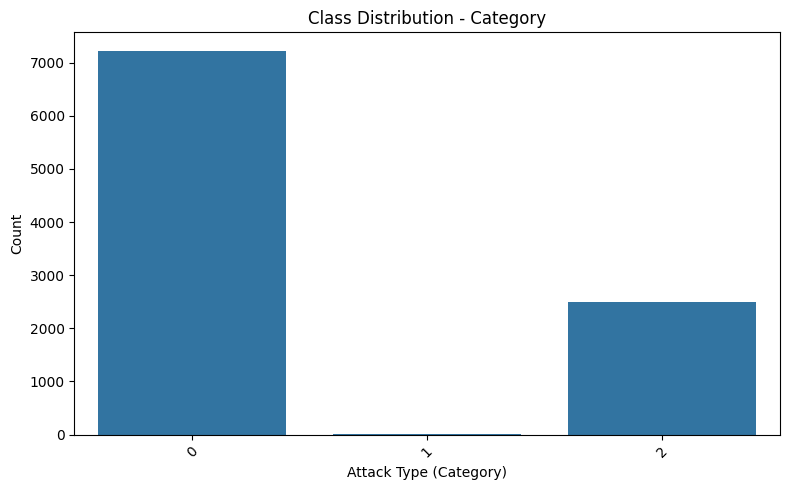

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='category', data=df)
plt.title('Class Distribution - Category')
plt.xlabel('Attack Type (Category)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

step 3: correlation heat map

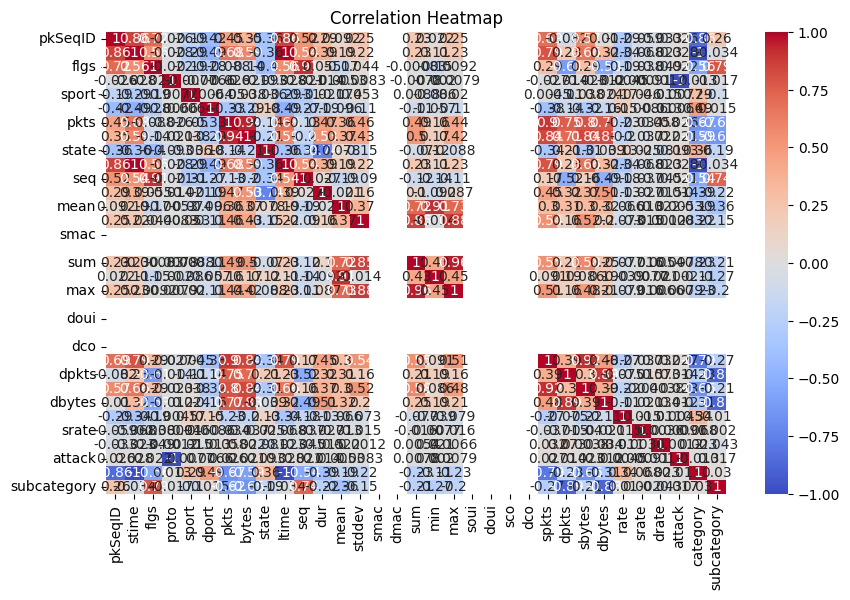

In [25]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


EXPERIMENT 7-8: Apply feature selecetion techniques

I AM APPLYING CHI- SQUAARE METHOD FOR THIS

In [30]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Ensure all values in X are non-negative using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest with chi2
selector = SelectKBest(chi2, k=3)
X_selected = selector.fit_transform(X_scaled, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['flgs', 'proto', 'state'], dtype='object')


experiment 9-10: applying wrapper methods

I am using recursive feature elimination

In [33]:
# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

# Display the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)


Selected Features:
pkSeqID
stime
flgs
proto
pkts
state
ltime
seq
category
subcategory


experement 11- embedded methods

I AM USING RANDOM FOREST HERE

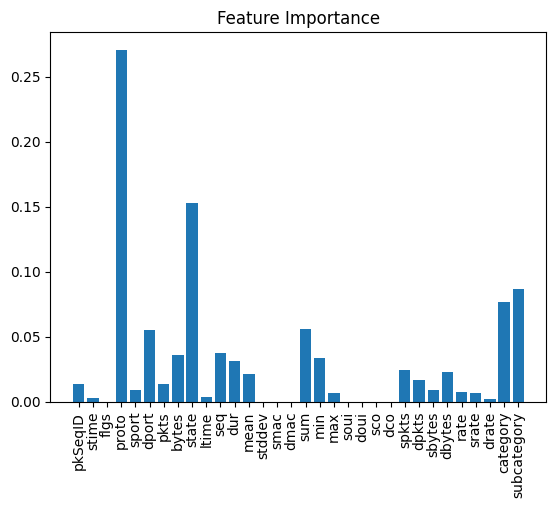

In [34]:
# Feature importance using RandomForest
model.fit(X, y)
importance = model.feature_importances_

# Visualize feature importance
plt.bar(X.columns, importance)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


experiment 12: using ml calssifiers

i am using random forest again

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      1940

    accuracy                           1.00      1942
   macro avg       0.50      0.50      0.50      1942
weighted avg       1.00      1.00      1.00      1942



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
